In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
CSV_IN = 'datos/Base datos_INTA_ascii_limpio.csv'

print 'Cargando datos de "%s"' % CSV_IN
df = pd.read_csv(CSV_IN, index_col='id', parse_dates=True)
print 'Cargado dataframe de tamaño %d filas x %d columnos' % df.shape
df.head(3)

Cargando datos de "datos/Base datos_INTA_ascii_limpio.csv"
Cargado dataframe de tamaño 423 filas x 34 columnos


,campana,sector,cultivo_antecesor,variedad,sistema_laboreo,fenologia_siembra_fecha,densidad_siembra_kg_ha,fenologia_emergencia_70pct_fecha,factor_rend_densidad_pl_m2,analisis_suelo_n,analisis_suelo_p,analisis_suelo_k,fert_cober_preriego_fecha,fert_cober_preriego_formulado,fert_cober_preriego_cant_n_kg_ha,fert_cober_dpf_fecha,fert_cober_dpf_cant_n_kg_ha,fert_cober_clk_cant_kg_ha,fenologia_dpf_fecha,fenologia_emerg_dpf_dias,riego_inicio_fecha,riego_chacra_completa_fecha,riego_velocidad_dias,riego_emerg_lote_completo_dias,fenologia_flor_50pct_fecha,fenologia_emerg_flor_50pct_dias,riego_finalizacion_fecha,fenologia_cosecha_fecha,fenologia_emerg_cosecha_dias,factor_rend_pcthcosecha,rendimiento_seco_kg_ha,factor_rend_pctfactor,rinde_con_factor_kg_ha,superficie_has
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"0708irundymirungaherrerito 27877,25",2008,herrerito,campo tural,irga417,conv,2007-10-25 00:00:00,103,2007-11-07 00:00:00,NaN,8.5,22.236,28.22,2007-12-04 00:00:00,80,36.8,NaN,NaN,NaN,NaN,NaN,2007-12-03 00:00:00,2007-12-05 00:00:00,2,28,2008-02-06 00:00:00,91,2008-03-03 00:00:00,2008-03-22 00:00:00,136,21.0,7877.250000,1.0521,8287.654725,8.0
"0708irundymirungaherrerito 38597,1914893617",2008,herrerito,campo tural,taim,conv,2007-10-25 00:00:00,103,2007-11-07 00:00:00,NaN,8.5,22.236,28.22,2007-12-04 00:00:00,80,36.8,NaN,NaN,NaN,NaN,NaN,2007-12-03 00:00:00,2007-12-07 00:00:00,4,30,2008-02-06 00:00:00,91,2008-03-03 00:00:00,2008-03-17 00:00:00,131,22.5,8597.191489,1.0650,9156.008936,23.5
"0708irundymirungaherrerito 48503,07462686567",2008,herrerito,campo tural,taim,conv,2007-10-25 00:00:00,103,2007-11-07 00:00:00,NaN,8.5,22.236,28.22,2007-12-04 00:00:00,80,36.8,NaN,NaN,NaN,NaN,NaN,2007-12-03 00:00:00,2007-12-09 00:00:00,6,32,2008-02-07 00:00:00,92,2008-03-03 00:00:00,2008-03-17 00:00:00,131,18.0,8503.074627,0.9230,7848.337881,33.5


In [3]:
# Funciones utiles

def scatter(df, x_col, y_col, labels=None):
    fig, ax = plt.subplots(1)
    ax.scatter(df[x_col], df[y_col], alpha=0.6, s=40)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    if labels is not None:
        for i, lab in enumerate(labels):
            x, y = (df[x_col].iloc[i], df[y_col].iloc[i])
            ax.annotate(lab, xy = (x, y), xytext = (x - 60, y + 20), fontsize=12)
    return fig, ax

def scatter_colored(df, x_col, y_col, color_var):
    fig, ax = plt.subplots(1)
    N = len(df[color_var].value_counts())
    colors = sns.color_palette('hls', N)
    for i, pair in enumerate(sorted(list(df.groupby(color_var)))):
        name, group = pair
        x, y = group[x_col], group[y_col]
        if x.count() and y.count():
            ax.scatter(x, y, alpha=0.6, s=40, color=colors[i], label=name)
    ax.legend()
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    return fig, ax

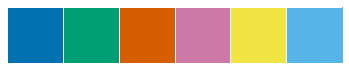

In [4]:
# Guardar unos colores buenas
BLUE, GREEN, ORANGE, PINK, YELLOW, LIGHTBLUE = sns.color_palette()
sns.palplot(sns.color_palette())

In [5]:
for col in df.columns:
    if col.endswith('_kg_ha'):
        total = col.replace('_kg_ha', '_kg_total')
        df[total] = [(x*y) for x,y in zip(df[col], df['superficie_has'])]

# Hacer un dataframe sumario por un columno, recalculando los promedios
def calc_sum_promedios(sum_col):
    sumframe = df.groupby(sum_col).sum()
    for col in sumframe.columns:
        if col.endswith('_kg_total'):
            promedio = col.replace('_kg_total', '_kg_ha')
            sumframe[promedio] = sumframe[col] / sumframe['superficie_has']
    return sumframe

sum_campana = calc_sum_promedios('campana')

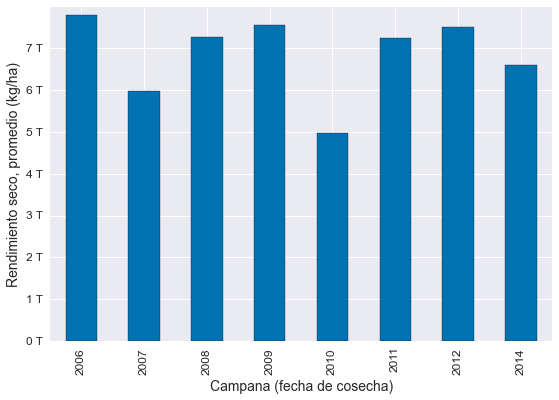

In [6]:
fig, ax = plt.subplots(1)
sum_campana['rendimiento_seco_kg_ha'].plot(kind='bar', ax=ax)
ax.set_xlabel('Campana (fecha de cosecha)')
ax.set_yticklabels(['%d T' % t for t in ax.get_xticks()])
ax.set_ylabel('Rendimiento seco, promedio (kg/ha)')

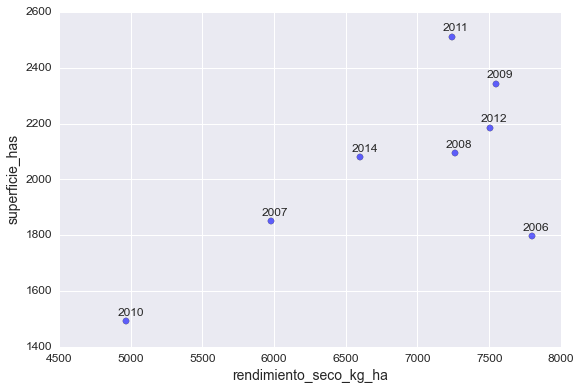

In [7]:
scatter(sum_campana, 'rendimiento_seco_kg_ha', 'superficie_has', labels=sum_campana.index.values)
pass

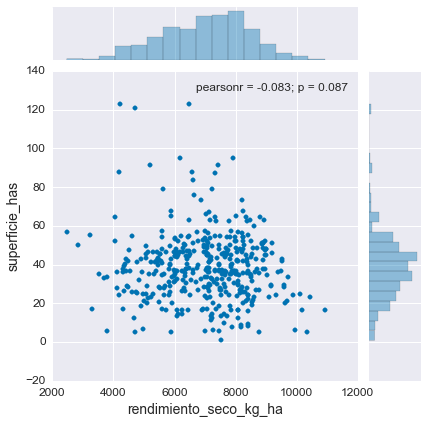

In [8]:
sns.jointplot(df['rendimiento_seco_kg_ha'], df['superficie_has'])

In [9]:
# # df = df.drop([c for c in df.columns if 'fecha' in c], axis=1)
# dummies = pd.get_dummies(df[[
#         c for c in df.columns if (
#             'fecha' not in c and c[:6] not in ('rinde_', 'rendim', 'factor'))]])
# dummies

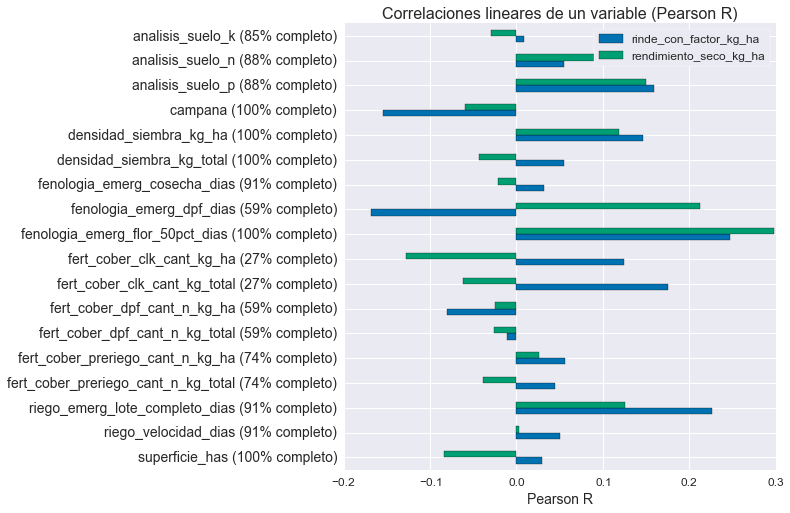

In [10]:
corr = df.corr(method='pearson')[['rinde_con_factor_kg_ha','rendimiento_seco_kg_ha']]
corr.dropna(inplace=True)
corr = corr.ix[[x for x in corr.index.values if x[:6] not in ('rinde_', 'rendim', 'factor')]].sort_index()[::-1]
fig, ax = plt.subplots(1)
fig.set_size_inches(12, 8)
corr.plot(ax=ax, kind='barh')
ax.set_title('Correlaciones lineares de un variable (Pearson R)')
ax.set_xlabel('Pearson R')
# for tick in ax.yaxis.get_major_ticks():
#     tick.label.set_fontsize(14)
ax.set_yticklabels(['%s (%.0f%% completo)' % (c.get_text(), df[c.get_text()].count() * 100.0 / len(df[c.get_text()])) for c in ax.get_yticklabels()],
                  fontsize=14)
ax.legend(loc='upper right', frameon=True, fontsize=12)
fig.subplots_adjust(left=0.4)
fig.savefig('figuras/correlaciones_pearson_dos_rendimientos.png')

In [11]:
# Todavia faltamos las variables categoricos, y faltamos los columnos que todavia necesitamos limpiar.
outvar = 'rendimiento_seco_kg_ha'
FOLDER = 'figuras/jointplot/'

try:
    os.mkdir(FOLDER)
except OSError:
    pass

def add_fit(fig, df, a, b, ordenes=1, colors=None):
    if not isinstance(ordenes, list):
        ordenes = [ordenes]
    ax = fig.get_axes()[0]
    if not colors:
        colors = ['gray']
        if len(ordenes) > 0:
            colors = sns.color_palette()[1:]
        if len(ordenes) > colors:
            colors = sns.color_palette('hls', len(ordenes))
    for i,o in enumerate(ordenes):
        col = colors[i]
        coeffs = np.polyfit(df[a].values, df[b].values, o)
        f = np.poly1d(coeffs)
        pred = f(df[a].values)
        r, p = pearsonr(pred, df[b].values)
        x = np.linspace(min(df[a]), max(df[a]), 200)
        y = f(x)
        ax.plot(x, y, color=col, alpha=0.7, linestyle='--',
                 linewidth=2, label='Fit %do (R2 = %.4f, p = %.4f)' % (o, r, p))
    ax.legend(loc='upper right')

for i, var in enumerate(corr.index.values):
    print var
    f = df[[var, outvar]].dropna()
    try:
        if var != 'campana':
            continue
        sns.jointplot(f[var], f[outvar])
        fig = plt.gcf()
        fig.subplots_adjust(left=0.2)
        add_fit(fig, f, var, outvar, range(1,3))
        fig.savefig(os.path.join(FOLDER, '%s.png' % var))
    except OverflowError:
        print "** ERROR **"
    if i > 0:
        plt.close()

superficie_has
riego_velocidad_dias
riego_emerg_lote_completo_dias
fert_cober_preriego_cant_n_kg_total
fert_cober_preriego_cant_n_kg_ha
fert_cober_dpf_cant_n_kg_total
fert_cober_dpf_cant_n_kg_ha
fert_cober_clk_cant_kg_total
fert_cober_clk_cant_kg_ha
fenologia_emerg_flor_50pct_dias
fenologia_emerg_dpf_dias
fenologia_emerg_cosecha_dias
densidad_siembra_kg_total
densidad_siembra_kg_ha
campana
analisis_suelo_p
analisis_suelo_n
analisis_suelo_k
